# Predicting wine quality with Regression and KNN

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [20]:
df = pd.read_csv('/Users/j/redwine.csv')

print(df.isnull().sum())
df.dtypes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [21]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
df.columns= ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulferDioxide',
             'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [23]:
df.describe()

,fixedAcidity,volatieAcidity,citricAcid,residualSugar,chlorides,freeSulferDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


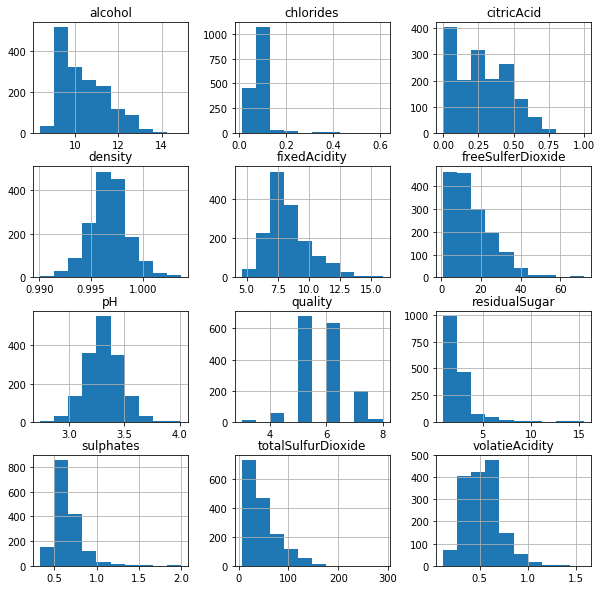

fixedAcidity  not normal
volatieAcidity  not normal
citricAcid  not normal
residualSugar  not normal
chlorides  not normal
freeSulferDioxide  not normal
totalSulfurDioxide  not normal
density  not normal
pH  not normal
sulphates  not normal
alcohol  not normal
quality  not normal


In [26]:
from scipy import stats

df.hist(figsize = (10,10))
plt.show()

for col in df.columns:
    _,pval = stats.normaltest(df[col])
    if pval > .1:
        print(col, pval)
    else:
        print(col, " not normal")
    

My features and outcomes don't have a normal distribution. Most have a left skew.

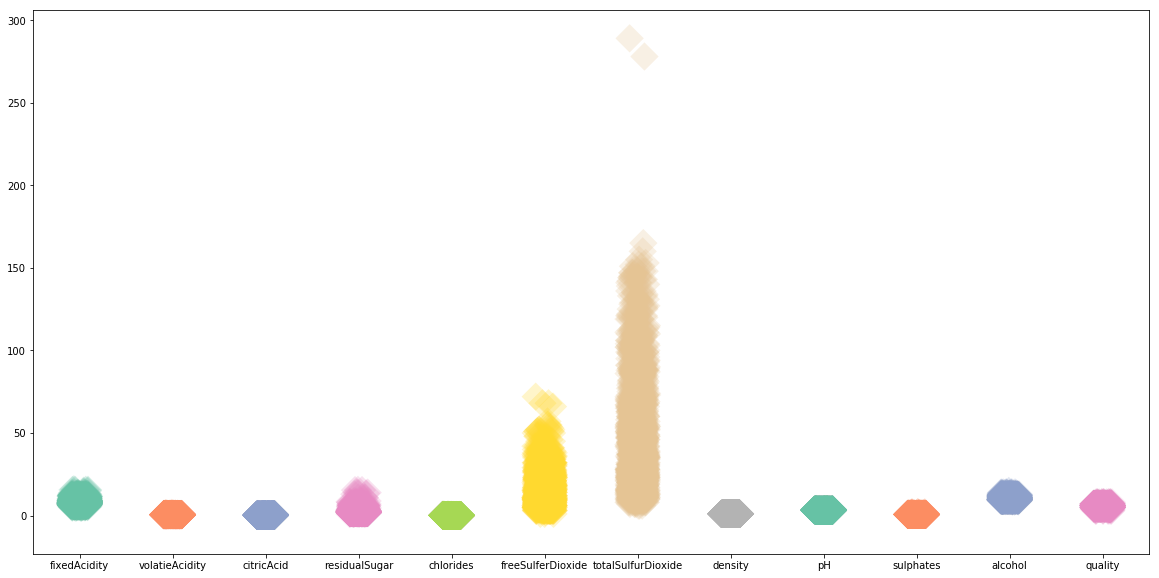

In [52]:
f, ax = plt.subplots(figsize=(20, 10))
g =sns.stripplot(data=df, palette="Set2", size=20, marker="D",orient = 'v',
                 edgecolor="gray", alpha=.25, jitter= True)
plt.show()



My features all have similar means and variances, save for freeSulferDioxide which is slightly higher and Total Sulfur Dioxide which has a few large outilers. 

                    fixedAcidity  volatieAcidity  citricAcid  residualSugar  \
fixedAcidity            1.000000       -0.256131    0.671703       0.114777   
volatieAcidity         -0.256131        1.000000   -0.552496       0.001918   
citricAcid              0.671703       -0.552496    1.000000       0.143577   
residualSugar           0.114777        0.001918    0.143577       1.000000   
chlorides               0.093705        0.061298    0.203823       0.055610   
freeSulferDioxide      -0.153794       -0.010504   -0.060978       0.187049   
totalSulfurDioxide     -0.113181        0.076470    0.035533       0.203028   
density                 0.668047        0.022026    0.364947       0.355283   
pH                     -0.682978        0.234937   -0.541904      -0.085652   
sulphates               0.183006       -0.260987    0.312770       0.005527   
alcohol                -0.061668       -0.202288    0.109903       0.042075   
quality                 0.124052       -0.390558    

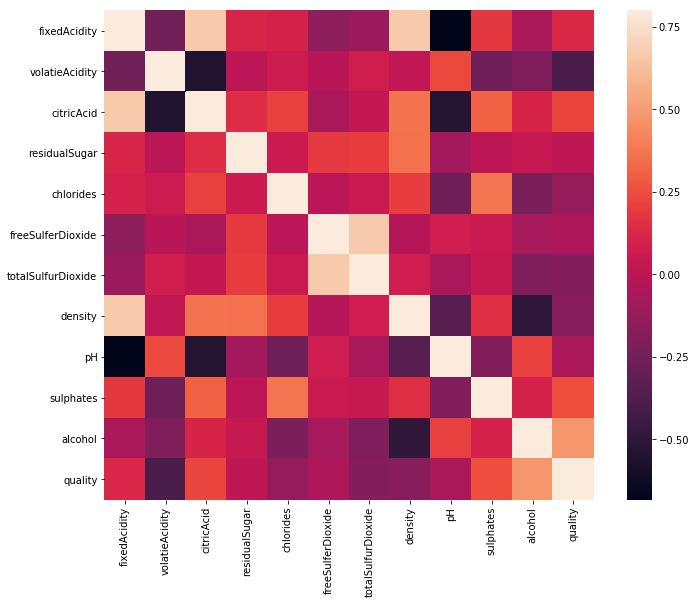

In [53]:
# Make a correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

I'll keep the top 3 features which are all have a positive correlation over .2. There aren't any good candidate features to combine into a new one.

fixedAcidity


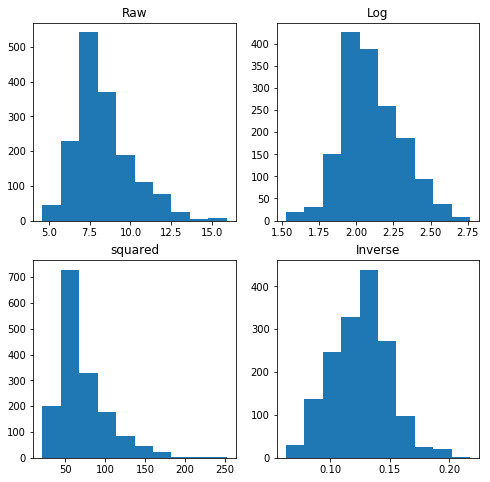

volatileAcidity


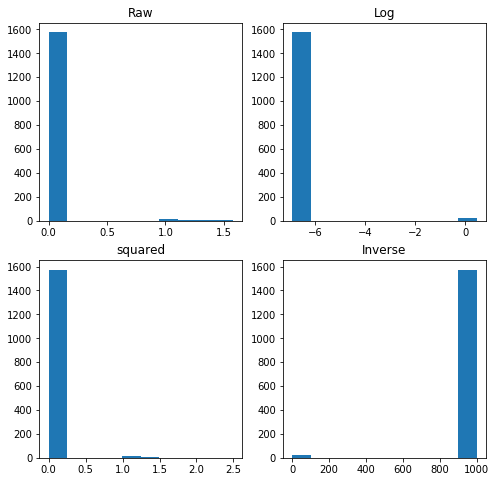

citricAcid


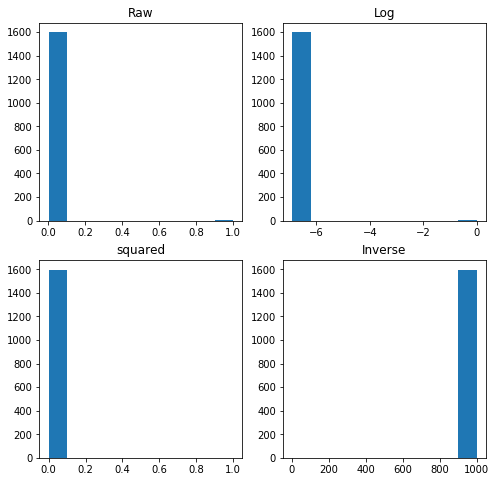

residualSugar


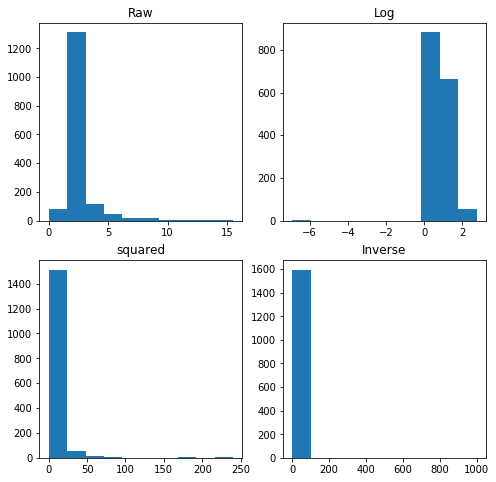

chlorides


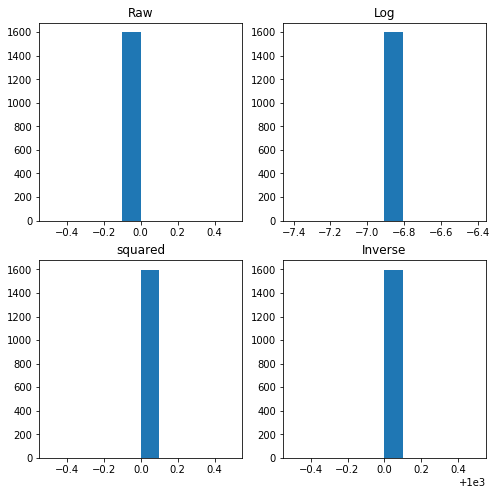

freeSulferDioxide


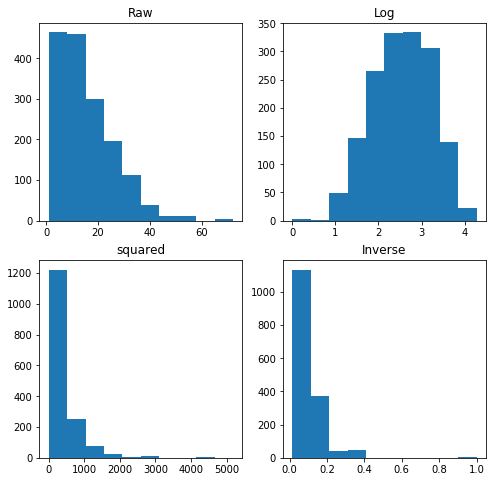

totalSulfurDioxide


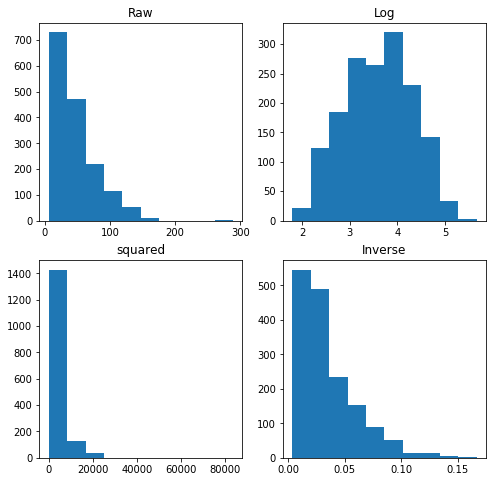

density


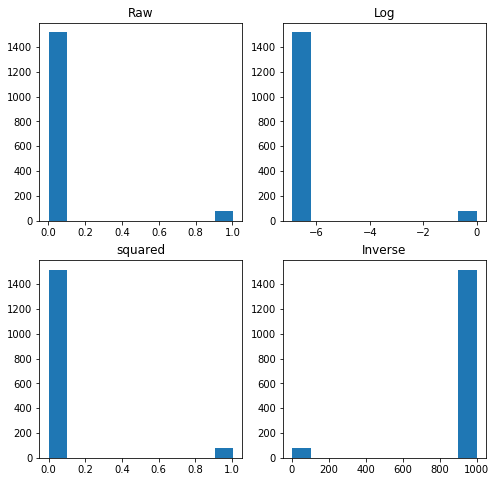

pH


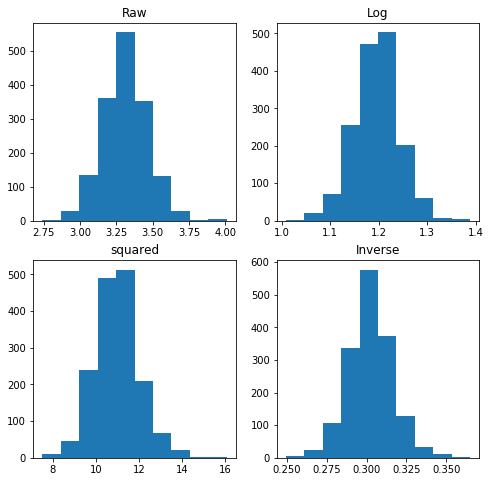

sulphates


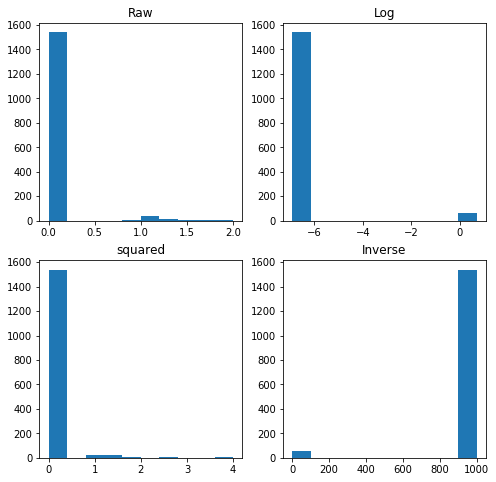

alcohol


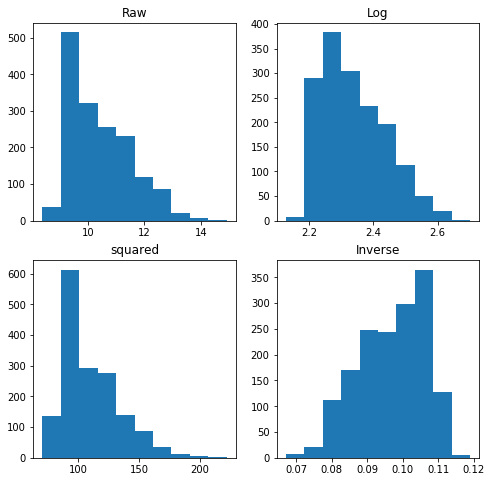

quality


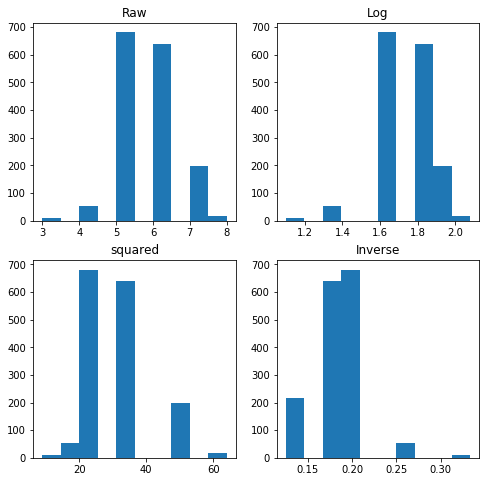

In [61]:
#Making a four-panel plot.
dfPlots = df.copy()
for col in dfPlots.columns:
    dfPlots[col] = df[col].apply(lambda x: .001 if x <1 else x)



for col in dfPlots.columns:
    print(col)
    fig = plt.figure(figsize = (8,8))
    ax1 =plt.subplot(221)
    plt.hist(dfPlots[col])
    plt.title('Raw')
    
    ax2 =plt.subplot(222)
    plt.hist(np.log(dfPlots[col]))
    plt.title('Log')
    
    ax3=plt.subplot(223)
    plt.hist(np.sqrt(dfPlots[col]))
    plt.title('Square Root')
    
    ax4=plt.subplot(224)
    plt.hist(1/dfPlots[col])
    plt.title('Inverse')
    plt.show()

In [59]:
dfCandidates = pd.DataFrame()
#Transform data
dfCandidates['fixedAcidityLog'] = np.log(df['fixedAcidity'])
dfCandidates['fixedAcidityInv'] = 1/df['fixedAcidity']
dfCandidates['freeSulferDioxide'] = np.log(df['freeSulferDioxide'])
dfCandidates['totalSulferDioxide'] = np.log(df['freeSulferDioxide'])
dfCandidates['pHLog'] = np.log(df['pH'])
dfCandidates['pHInv'] = 1/(df['pH'])
dfCandidates['pHSqrt'] = np.sqrt(df['pH'])    


for col in dfCandidates.columns:
    _,pval = stats.normaltest(dfCandidates[col])
    if pval > .055:
        print(col, pval, "NORMAL")
    else:
        print(col, pval, " not normal")

fixedAcidityLog 2.59201594639e-09  not normal
fixedAcidityInv 0.000911059520412  not normal
freeSulferDioxide 4.21794324723e-09  not normal
totalSulferDioxide 4.21794324723e-09  not normal
pHLog 0.00011668236681  not normal
pHInv 1.32204564342e-06  not normal
pHSqrt 1.16092702606e-05  not normal


                    fixedAcidityLog  fixedAcidityInv  freeSulferDioxide  \
fixedAcidityLog            1.000000        -0.990347          -0.177755   
fixedAcidityInv           -0.990347         1.000000           0.172023   
freeSulferDioxide         -0.177755         0.172023           1.000000   
totalSulferDioxide        -0.177755         0.172023           1.000000   
pHLog                     -0.705837         0.715221           0.095976   
pHInv                      0.704099        -0.710742          -0.095904   
pHSqrt                    -0.706252         0.717028           0.095905   
quality                    0.114238        -0.099279          -0.050087   

                    totalSulferDioxide     pHLog     pHInv    pHSqrt   quality  
fixedAcidityLog              -0.177755 -0.705837  0.704099 -0.706252  0.114238  
fixedAcidityInv               0.172023  0.715221 -0.710742  0.717028 -0.099279  
freeSulferDioxide             1.000000  0.095976 -0.095904  0.095905 -0.050087  


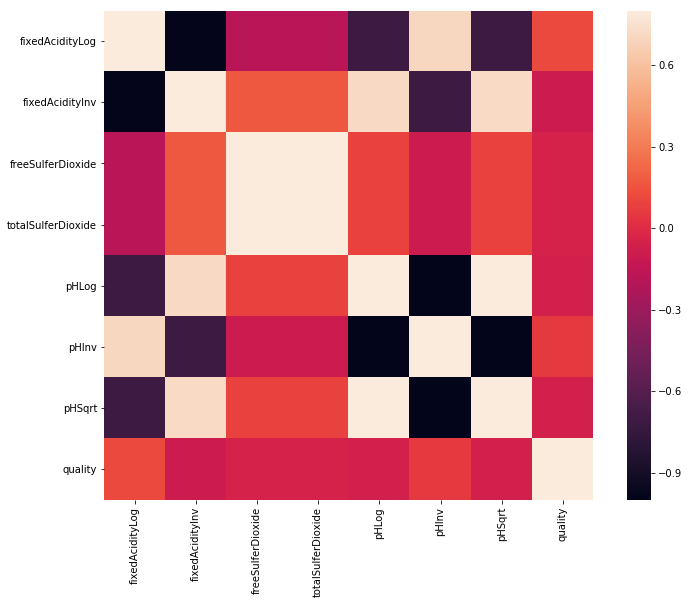

In [60]:
dfCandidates['quality'] = df['quality']

# Make a correlation matrix.
corrmat = dfCandidates.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

This was a dead end as none of the transformed formations greatly improved the normalcy of the data and none of my features rose about my .2 threshold I used above.

In [64]:
#reduce set down to features I'm using
data = df.loc[:, ['quality', 'sulphates', 'alcohol', 'citricAcid']]

             quality  sulphates   alcohol  citricAcid
quality     1.000000   0.251397  0.476166    0.226373
sulphates   0.251397   1.000000  0.093595    0.312770
alcohol     0.476166   0.093595  1.000000    0.109903
citricAcid  0.226373   0.312770  0.109903    1.000000


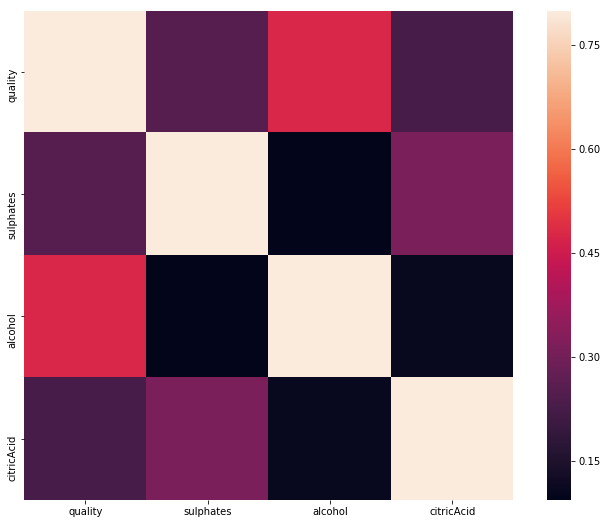

In [65]:
corrmat = data.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

I'll leave these three variables as is so I have one to drop if none of them prove to signficant to my model.

## Modeling

### OLS

In [74]:
#Split data and create train test variables
#from sklearn.model_selection import train_test_split
x, y = data.iloc[:,1:].values, data.iloc[:,0].values
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=.3)
        
                     

In [82]:
# Fit linear regression model
from sklearn import linear_model

# Instantiate and fit model with test data
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

# Get score for training data
print('Training Score Accuracy: %0.3f ' % lm.score(x_train, y_train))
print('Testing Score Accuracy: %0.3f ' % lm.score(x_test, y_test))

Training Score Accuracy: 0.294 
Testing Score Accuracy: 0.256 


In [83]:
import statsmodels.formula.api as smf
#Specify formula
linear_formula = 'quality ~ sulphates+alcohol+citricAcid'

# Run model and print
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     210.5
Date:                Thu, 17 May 2018   Prob (F-statistic):          5.05e-115
Time:                        18:26:06   Log-Likelihood:                -1660.0
No. Observations:                1599   AIC:                             3328.
Df Residuals:                    1595   BIC:                             3349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4339      0.176      8.140      0.0

This simple model does a poor job of predicting the quality of wine. Building new features or otherwise transforming the features might be necessary to build a better Model

### KNN

In [86]:
from sklearn import neighbors

In [96]:
#
def knn(k):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    print('Neighbors', k)
    print('Training Score Accuracy: %0.3f ' % knn.score(x_train, y_train))
    print('Testing Score Accuracy: %0.3f ' % knn.score(x_test, y_test))

def knnW(k):
    knnW = neighbors.KNeighborsRegressor(n_neighbors=k, weights ='distance')
    knnW.fit(x_train, y_train)
    
    print('Neighbors', k)
    print('Weighted Training Score Accuracy: %0.3f ' % knnW.score(x_train, y_train))
    print('Weighted Testing Score Accuracy: %0.3f ' % knnW.score(x_test, y_test))
    
    
knn(5)
knnW(5)


Neighbors 5
Training Score Accuracy: 0.531 
Testing Score Accuracy: 0.204 
Neighbors 5
Weighted Training Score Accuracy: 0.990 
Weighted Testing Score Accuracy: 0.314 


In [108]:
knn(10)
knnW(10)

Neighbors 10
Training Score Accuracy: 0.464 
Testing Score Accuracy: 0.233 
Neighbors 10
Weighted Training Score Accuracy: 0.990 
Weighted Testing Score Accuracy: 0.342 


In [98]:
knnW(20)

Neighbors 20
Weighted Training Score Accuracy: 0.990 
Weighted Testing Score Accuracy: 0.364 


In [104]:
#Try sqrt of N as K:
print(np.sqrt(len(data)))

39.9874980463


In [110]:
knnW(40)
knn(40)

Neighbors 40
Weighted Training Score Accuracy: 0.990 
Weighted Testing Score Accuracy: 0.380 
Neighbors 40
Training Score Accuracy: 0.350 
Testing Score Accuracy: 0.260 


The weighted KNN model is probably overfitting, but it's model is accounting for ~70% more variance than the unweighted KNN model or the OLS model, which both came out about equal once I upped the number of neighbors to 40. 

All in all, the KNN model seems simpler to run and tweak, and makes more intuitive sense.